In [104]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# Reading file and creating train and test data and labels
data = pandas.read_csv('heart.csv')
print('number of all rows: ' + str(len(data)))
data = data.dropna()
print('number of after drop rows that contain nan value: ' + str(len(data)))
labels = data['target']
data.pop('target')
data

number of all rows: 303
number of after drop rows that contain nan value: 303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


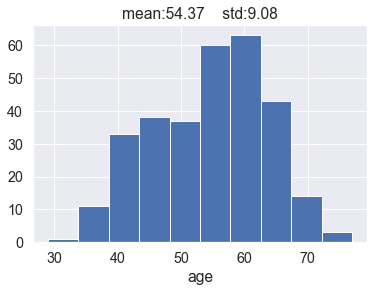

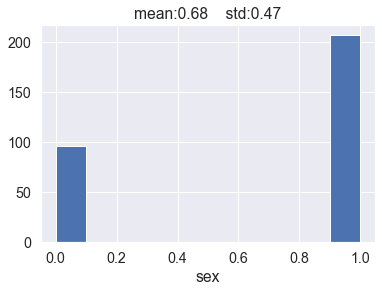

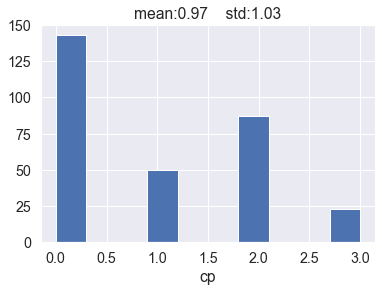

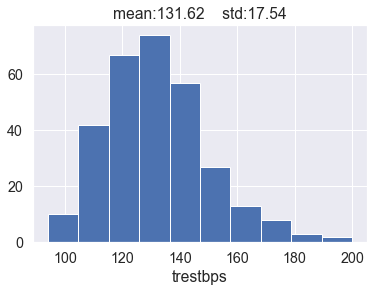

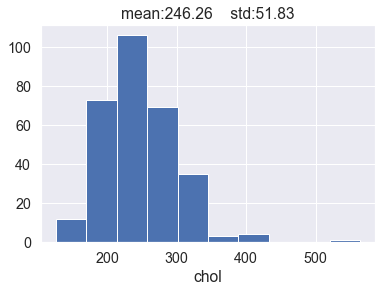

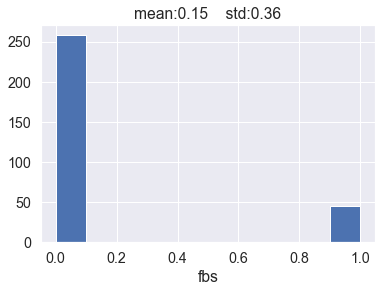

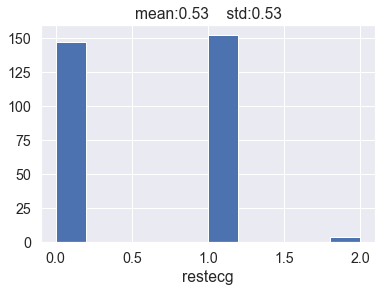

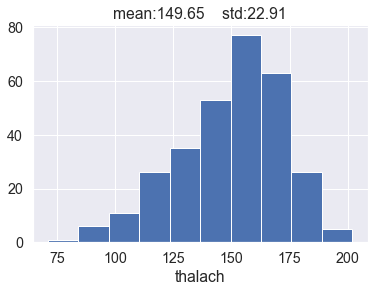

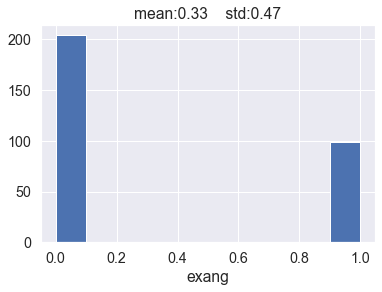

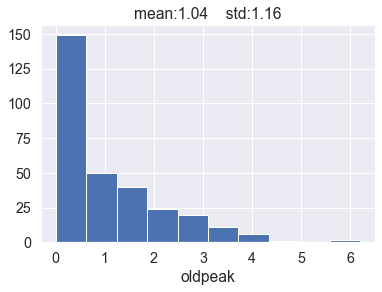

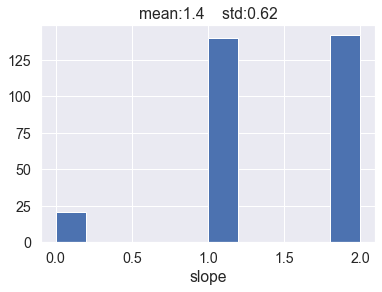

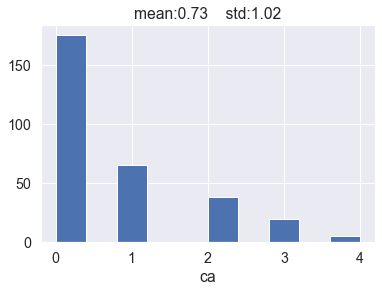

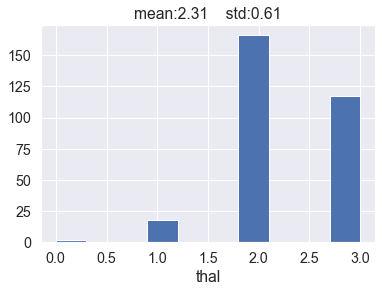

In [106]:
# Plot histogram for values of all columns
for i in data.columns:
    plt.figure()
    plt.hist(data[i])
    plt.xlabel(i)
    plt.title('mean:' + str(data[i].mean().round(2)) + '    std:' + str(data[i].std().round(2)))

corrolated attrs:[('slope', 'thalach'), ('thalach', 'slope')]


<bound method NDFrame.head of           age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.818182  1.0  1.000000     0.725  0.413121  1.0      0.0  0.742574   
1    0.480519  1.0  0.666667     0.650  0.443262  0.0      0.5  0.925743   
2    0.532468  0.0  0.333333     0.650  0.361702  0.0      0.0  0.851485   
3    0.727273  1.0  0.333333     0.600  0.418440  0.0      0.5  0.881188   
4    0.740260  0.0  0.000000     0.600  0.627660  0.0      0.5  0.806931   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.740260  0.0  0.000000     0.700  0.427305  0.0      0.5  0.608911   
299  0.584416  1.0  1.000000     0.550  0.468085  0.0      0.5  0.653465   
300  0.883117  1.0  0.000000     0.720  0.342199  1.0      0.5  0.698020   
301  0.740260  1.0  0.000000     0.650  0.232270  0.0      0.5  0.569307   
302  0.740260  0.0  0.333333     0.650  0.418440  0.0      0.0  0.861386   

     exang   oldpeak  slope    ca      thal  slope_thalac

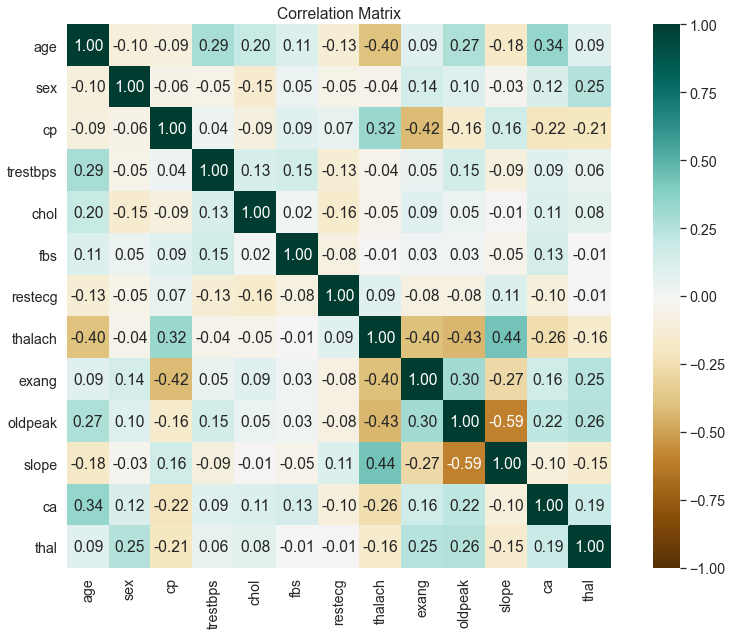

In [107]:
# Normalize data
data = data.apply(lambda x: x/x.max(), axis=0)

# Calculate corrolation between attrs and plot result
corr_categorical=data.corr(method='spearman')
plt.figure(figsize=(15, 10))
sns.heatmap(corr_categorical, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1, center= 0, square=True)
plt.title("Correlation Matrix")

# Add new columns according to corrolated columns
corrolated_attrs = []
for col in corr_categorical.columns:
    for row in corr_categorical.index:
        if corr_categorical[row][col] > 0.4 and corr_categorical[row][col] < 1:
            corrolated_attrs.append((row, col))
print('corrolated attrs:' + str(corrolated_attrs))
for corrolated_attr in corrolated_attrs:
    data[corrolated_attr[0]+'_'+corrolated_attr[1]] = (data[corrolated_attr[0]] + data[corrolated_attr[1]])/2
data.head

In [108]:
# Split data to train and test 
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.20)

In [109]:
# Neive Bayes classifier
naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(train_data, train_labels)
score = naive_bayes.score(test_data, test_labels)
print('accurecy in naive bayes: ' + str(score))

accurecy in naive bayes: 0.8360655737704918


In [110]:
# KNN classifier
best_score = 0
best_k = 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(train_data, train_labels)
    score = knn.score(test_data, test_labels)
    print('accurecy in knn with k={}: '.format(k) + str(score))
    if best_score < score:
        best_score = score
        best_k = k
print('####################################################')
print('Best accurecy in knn is with k={}: '.format(best_k) + str(best_score))
print('####################################################')

accurecy in knn with k=1: 0.6885245901639344
accurecy in knn with k=2: 0.7049180327868853
accurecy in knn with k=3: 0.7868852459016393
accurecy in knn with k=4: 0.8032786885245902
accurecy in knn with k=5: 0.8032786885245902
accurecy in knn with k=6: 0.8032786885245902
accurecy in knn with k=7: 0.819672131147541
accurecy in knn with k=8: 0.8032786885245902
accurecy in knn with k=9: 0.7868852459016393
accurecy in knn with k=10: 0.819672131147541
accurecy in knn with k=11: 0.8032786885245902
accurecy in knn with k=12: 0.7868852459016393
accurecy in knn with k=13: 0.7540983606557377
accurecy in knn with k=14: 0.7704918032786885
accurecy in knn with k=15: 0.7704918032786885
accurecy in knn with k=16: 0.7377049180327869
accurecy in knn with k=17: 0.7868852459016393
accurecy in knn with k=18: 0.8032786885245902
accurecy in knn with k=19: 0.819672131147541
accurecy in knn with k=20: 0.7704918032786885
####################################################
Best accurecy in knn is with k=7: 0.819